# Reddit_model


In [367]:
#Import all libraries used in this notebook
import pandas as pd 
import numpy as np
import regex as re
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from bs4 import BeautifulSoup   
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [368]:
# import cleaned comments data from csv
df=pd.read_csv('comments_clean.csv')

In [369]:
df.head()

,title,score,over_18,is_self,url,body,id,subreddit,top_rank,text
0,Depression for me is a constant feeling of wan...,7198,False,True,https://www.reddit.com/r/depression/comments/c...,It’s a constant sense of wanting to go somewhe...,cpidz8,depression,1,Depression for me is a constant feeling of wan...
1,Depression is so much worse if you live with y...,6781,False,True,https://www.reddit.com/r/depression/comments/c...,"I can't hide, I can't cry out loud, they don't...",c2fuf3,depression,2,Depression is so much worse if you live with y...
2,A stranger just saved my life...,5946,False,True,https://www.reddit.com/r/depression/comments/7...,I woke up today wanting to die. I was planning...,7k1nt2,depression,3,A stranger just saved my life...I woke up toda...
3,Shout out to the particular hell that is funct...,5531,False,True,https://www.reddit.com/r/depression/comments/c...,"This is me. Don’t get me wrong, it’s better th...",cd0hjp,depression,4,Shout out to the particular hell that is funct...
4,"Does anyone ever feel okay for a while, then a...",5054,False,True,https://www.reddit.com/r/depression/comments/b...,Recently I thought I was beginning to feel bet...,b7fxrm,depression,5,"Does anyone ever feel okay for a while, then a..."


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
title        1560 non-null object
score        1560 non-null int64
over_18      1560 non-null bool
is_self      1560 non-null bool
url          1560 non-null object
body         1560 non-null object
id           1560 non-null object
subreddit    1560 non-null object
top_rank     1560 non-null int64
text         1560 non-null object
dtypes: bool(2), int64(2), object(6)
memory usage: 100.7+ KB


In [371]:
# Target is 'subreddit'. Current values: 'depression', 'anxiety'.
# Need to transform to 0 or 1 values. Set depression = 0, anxiety= 1

df['target'] = df['subreddit'].map({'depression':0, 'Anxiety':1})
df.drop('subreddit', axis=1, inplace=True)


In [372]:
# Target is 'subreddit'. Current values: 'depression', 'anxiety'.
# Need to transform to 0 or 1 values. Set depression = 0, anxiety= 1
df.head()

,title,score,over_18,is_self,url,body,id,top_rank,text,target
0,Depression for me is a constant feeling of wan...,7198,False,True,https://www.reddit.com/r/depression/comments/c...,It’s a constant sense of wanting to go somewhe...,cpidz8,1,Depression for me is a constant feeling of wan...,0
1,Depression is so much worse if you live with y...,6781,False,True,https://www.reddit.com/r/depression/comments/c...,"I can't hide, I can't cry out loud, they don't...",c2fuf3,2,Depression is so much worse if you live with y...,0
2,A stranger just saved my life...,5946,False,True,https://www.reddit.com/r/depression/comments/7...,I woke up today wanting to die. I was planning...,7k1nt2,3,A stranger just saved my life...I woke up toda...,0
3,Shout out to the particular hell that is funct...,5531,False,True,https://www.reddit.com/r/depression/comments/c...,"This is me. Don’t get me wrong, it’s better th...",cd0hjp,4,Shout out to the particular hell that is funct...,0
4,"Does anyone ever feel okay for a while, then a...",5054,False,True,https://www.reddit.com/r/depression/comments/b...,Recently I thought I was beginning to feel bet...,b7fxrm,5,"Does anyone ever feel okay for a while, then a...",0


# Set up X, y and test_train_split

In [373]:
X = df['text']
y = df['target']

In [374]:
#Check if the classes are balanced
y.value_counts(normalize=True)
# the classes are balanced, each is approx 50%

0    0.559615
1    0.440385
Name: target, dtype: float64

In [375]:
# train/test split
# stratify y just in case, even though the classes are balanced
# test_size : default = 0.25
# shuffle: default = True

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Edit Stop Words:

In [376]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['did', 'doe', 'don', 'doesn', 'getting', 'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [377]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

# Explore Importance of features, stop_words & n-grams

In [378]:
# using standard stop words = "english"

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
lr = LogisticRegression()

pipe = Pipeline([ 
    ('cvec', cvec),
    ('lr', lr)
])


In [379]:
# fit the model
pipe.fit(X_train, y_train)

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=10000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                     

In [380]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9991452991452991
test score: 0.8564102564102564


In [381]:
lr_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat00.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
lr_feat00.sort_values(by='abs_coef', ascending=False)

,coef_,abs_coef
anxiety,2.884507e+00,2.884507e+00
depression,-2.445974e+00,2.445974e+00
anxious,1.773494e+00,1.773494e+00
depressed,-1.379574e+00,1.379574e+00
kill,-1.074996e+00,1.074996e+00
...,...,...
hyperbole,-2.044181e-08,2.044181e-08
officially,-2.044181e-08,2.044181e-08
opposed,-2.044181e-08,2.044181e-08
futility,-2.044181e-08,2.044181e-08


In [382]:
# using additional stop words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec',cvec),
    ('lr',lr)
    
])


In [383]:
pipe.fit(X_train, y_train)

print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9991452991452991
test score: 0.8717948717948718


In [384]:
lr_feat01 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat01.columns = ['coef_']
lr_feat01.sort_values(by='coef_', ascending=False)

,coef_
anxiety,2.848392
anxious,1.687877
hey,1.035304
went,0.952525
phone,0.916240
...,...
sad,-0.774956
burden,-0.842662
kill,-1.027518
depressed,-1.399303


In [385]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [386]:
# using standard stop words = "english"

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)

rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])


In [387]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9914529914529915
test score: 0.7923076923076923


In [388]:

rf_feat00 = pd.DataFrame(data=rf.feature_importances_.T, index=cvec.get_feature_names())
rf_feat00.columns=['feature_importances_']

rf_feat00.sort_values(by='feature_importances_', ascending=False)

,feature_importances_
anxiety,0.130378
anxious,0.018142
panic,0.014849
depression,0.011895
attack,0.011605
...,...
fool,0.000000
foods,0.000000
foodies,0.000000
foo,0.000000


In [389]:
# using additional stop words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9888888888888889
test score: 0.8


In [390]:
rf_feat01 = pd.DataFrame(data=rf.feature_importances_.T, index=cvec.get_feature_names())
rf_feat01.columns=['feature_importances_']

rf_feat01.sort_values(by='feature_importances_', ascending=False)

,feature_importances_
anxiety,0.157727
anxious,0.017402
depressed,0.009618
life,0.008946
attack,0.008785
...,...
focking,0.000000
fo3,0.000000
fml,0.000000
flying,0.000000


In [391]:
rf_feat01.sort_values(by='feature_importances_', ascending=False)

,feature_importances_
anxiety,0.157727
anxious,0.017402
depressed,0.009618
life,0.008946
attack,0.008785
...,...
focking,0.000000
fo3,0.000000
fml,0.000000
flying,0.000000


# n-grams

In [392]:
# CountVectorizer & Logistic regression using additional stop words and 1 - 3 n-grams

cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9991452991452991
test score: 0.8743589743589744


In [393]:
lr_feat02 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat02.columns = ['coef_']
lr_feat02['abs_coef'] = np.abs(lr_feat02['coef_'])
lr_feat02.sort_values(by='abs_coef', ascending=False)

,coef_,abs_coef
anxiety,2.841488e+00,2.841488e+00
depression,-2.276123e+00,2.276123e+00
anxious,1.546203e+00,1.546203e+00
depressed,-1.263730e+00,1.263730e+00
phone,9.498947e-01,9.498947e-01
...,...,...
explain people,3.013778e-08,3.013778e-08
sucked,2.209306e-08,2.209306e-08
energy drink,1.105156e-08,1.105156e-08
bon,1.105156e-08,1.105156e-08


In [394]:
lr_feat02.sort_values(by='abs_coef', ascending=False).tail(30)


,coef_,abs_coef
think important,-2.049702e-07,2.049702e-07
tell conversation,-2.049702e-07,2.049702e-07
thought tell,-2.049702e-07,2.049702e-07
best help,-2.049702e-07,2.049702e-07
nervous edge,-2.008664e-07,2.008664e-07
just personality,-2.008664e-07,2.008664e-07
fear confrontation,-1.999919e-07,1.999919e-07
fear talking,-1.966815e-07,1.966815e-07
stammering,-1.959530e-07,1.959530e-07
talk anxiety,-1.924967e-07,1.924967e-07


In [395]:
# tf-idf & Logistic regression using additional stop words and 1 - 3 n-grams

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 3))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])



In [396]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9683760683760684
test score: 0.8794871794871795


In [397]:
lr_tf_feat01 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_feat01.columns = ['coef_']
lr_tf_feat01['abs_coef'] = np.abs(lr_tf_feat01['coef_'])
lr_tf_feat01.sort_values(by='abs_coef', ascending=False).head(10)

,coef_,abs_coef
anxiety,6.958719,6.958719
depression,-3.832360,3.832360
anxious,3.061427,3.061427
depressed,-2.324780,2.324780
life,-2.147913,2.147913
panic,1.864578,1.864578
want,-1.776281,1.776281
attack,1.484124,1.484124
went,1.449451,1.449451
sad,-1.355714,1.355714


In [398]:
# CountVectorizer & Random forest using additional stop words and 1 - 3 n-grams

cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9914529914529915
test score: 0.8205128205128205


In [399]:

df_rf_feat02 = pd.DataFrame(data=rf.feature_importances_, index=cvec.get_feature_names())

df_rf_feat02.columns = ['feature_importances_']

df_rf_feat02.sort_values(by='feature_importances_', ascending=False).head(10)


,feature_importances_
anxiety,0.115870
anxious,0.015690
life,0.010273
depression,0.010018
sad,0.008463
calm,0.008332
panic,0.007867
panic attack,0.006388
feel anxious,0.005314
went,0.005309


# CountVectorizer VS Tf-idf

In [400]:
# tfidf using "english" stop words, 1-grams

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = "english", 
                     max_features = 1000, 
                     ngram_range = (1, 1))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [401]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.941025641025641
test score: 0.8769230769230769


In [402]:
lr_tf_feat00 = pd.DataFrame(data=lr.coef_.T, index=tf.get_feature_names())
lr_tf_feat00.columns = ['coef_']
lr_tf_feat00['abs_coef'] = np.abs(lr_tf_feat00['coef_'])
lr_tf_feat00.sort_values(by='abs_coef', ascending=False).head(10)

,coef_,abs_coef
anxiety,7.502208,7.502208
depression,-4.529477,4.529477
anxious,3.482880,3.482880
depressed,-2.575890,2.575890
life,-2.308485,2.308485
panic,2.063861,2.063861
want,-1.735355,1.735355
attack,1.651985,1.651985
sad,-1.586727,1.586727
don,-1.568858,1.568858


In [403]:
lr_tf_feat00.sort_values(by='abs_coef', ascending=False).tail(10)


,coef_,abs_coef
foot,0.004790,0.004790
smiling,-0.004602,0.004602
sister,-0.004553,0.004553
session,-0.003991,0.003991
incredibly,-0.003379,0.003379
apologize,-0.002627,0.002627
pas,-0.002607,0.002607
understand,0.002437,0.002437
diet,0.002055,0.002055
woman,-0.001674,0.001674


In [404]:
# using additional stop words

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 1))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [405]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9666666666666667
test score: 0.882051282051282


In [406]:
lr_tf_feat01 = pd.DataFrame(data=lr.coef_.T, index=tf.get_feature_names())
lr_tf_feat01.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
lr_tf_feat01.sort_values(by='coef_', ascending=False).head(10)

,coef_
anxiety,7.218353
anxious,3.271068
panic,2.019701
attack,1.635567
went,1.572836
phone,1.232381
does,1.192353
worry,1.187428
today,1.084474
nervous,1.029980


In [407]:
lr_tf_feat01.sort_values(by='coef_', ascending=False).tail(10)


,coef_
wish,-1.208728
fucking,-1.252773
suicide,-1.268928
kill,-1.319895
die,-1.339430
sad,-1.474712
want,-1.991418
life,-2.270227
depressed,-2.513117
depression,-4.242727


# Logistic Regression Model

In [408]:
# set up pipeline

# initialize
cvec = CountVectorizer(stop_words = stop_words)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [409]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9991452991452991
test score: 0.8717948717948718


In [410]:
# gridsearchCV tests cross-validation for the parameters

params = {
#     'cvec__stop_words': [None, 'english'], 
#     'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)]
    'cvec__max_features': [10000], 
    'cvec__ngram_range': [(1, 1)], 
#     'mnb__alpha': [0, 0.25, 0.5, 0.75, 1]
    # min_df
    # max_df
    # binary (use for BernoulliNB)
}

#instantiate GridSearchCV:
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=0)

#Fit the model
gs.fit(X_train, y_train)

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [411]:

print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8572649572649572
gs.best_params_ {'cvec__max_features': 10000, 'cvec__ngram_range': (1, 1)}
gs.score(X_test, y_test) 0.8717948717948718


# Multinomial Naive Bayes model


In [412]:
#initialize

cvec=CountVectorizer(stop_words=stop_words)
mnb=MultinomialNB()

pipe=Pipeline([
    ('cvec' , cvec),
    ('mnb', mnb)

])

In [413]:
# baseline MultinomialNB model

#fit
pipe.fit(X_train, y_train)

print("train score", pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))


train score 0.9666666666666667
test score: 0.8666666666666667


# gridserach

In [414]:
#gridsearchCV tests cross-validation for the parameters

params = {
#     'cvec__stop_words': [None, 'english'], 
#     'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)]
    'cvec__max_features': [10000], 
    'cvec__ngram_range': [(1, 1)], 
    'mnb__alpha': [0, 0.25, 0.5, 0.75, 1]
    # min_df
    # max_df
    # binary (use for BernoulliNB)
}
    

In [415]:
#instantiate
gs=GridSearchCV(pipe, param_grid=params, cv=5, verbose=1)


In [416]:
#Fit
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too smal

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [417]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8564102564102564
gs.best_params_ {'cvec__max_features': 10000, 'cvec__ngram_range': (1, 1), 'mnb__alpha': 1}
gs.score(X_test, y_test) 0.8666666666666667


In [418]:
mnb.feature_log_prob_

array([[ -9.54650304,  -9.95196814,  -9.95196814, ...,  -8.56567378,
         -9.95196814,  -9.54650304],
       [ -9.1983184 , -10.58461276, -10.58461276, ..., -10.58461276,
         -9.89146558,  -8.0196634 ]])

# Random forest model


In [419]:
# set up pipeline

# initialize
cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [420]:
# baseline Random forest

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/Users/Samrin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9888888888888889
test score: 0.8


In [421]:
# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [None, 'english'], 
    'cvec__max_features': [5000, 10000, 20000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [10, 20, 30],
    'rf__max_depth': [None, 10, 20]
}

gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   50.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=10000,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [422]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8376068376068376
gs.best_params_ {'cvec__max_features': 5000, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 20}
gs.score(X_test, y_test) 0.8205128205128205


# Sentiment Analysis


In [428]:
from textblob import TextBlob


In [431]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [432]:
# Create a new DataFrame column for sentiment 
df['sentiment'] = df.text.apply(detect_sentiment)


In [433]:
df

,title,score,over_18,is_self,url,body,id,top_rank,text,target,sentiment
0,Depression for me is a constant feeling of wan...,7198,False,True,https://www.reddit.com/r/depression/comments/c...,It’s a constant sense of wanting to go somewhe...,cpidz8,1,Depression for me is a constant feeling of wan...,0,0.100000
1,Depression is so much worse if you live with y...,6781,False,True,https://www.reddit.com/r/depression/comments/c...,"I can't hide, I can't cry out loud, they don't...",c2fuf3,2,Depression is so much worse if you live with y...,0,0.050758
2,A stranger just saved my life...,5946,False,True,https://www.reddit.com/r/depression/comments/7...,I woke up today wanting to die. I was planning...,7k1nt2,3,A stranger just saved my life...I woke up toda...,0,0.217825
3,Shout out to the particular hell that is funct...,5531,False,True,https://www.reddit.com/r/depression/comments/c...,"This is me. Don’t get me wrong, it’s better th...",cd0hjp,4,Shout out to the particular hell that is funct...,0,-0.025641
4,"Does anyone ever feel okay for a while, then a...",5054,False,True,https://www.reddit.com/r/depression/comments/b...,Recently I thought I was beginning to feel bet...,b7fxrm,5,"Does anyone ever feel okay for a while, then a...",0,0.130000
...,...,...,...,...,...,...,...,...,...,...,...
1555,I hate it when people glorify anxiety,466,False,True,https://www.reddit.com/r/Anxiety/comments/6ug7...,I see these posts every week about how girls w...,6ug7hu,996,I hate it when people glorify anxietyI see the...,1,0.035180
1556,Do phone calls upset anyone?,464,False,True,https://www.reddit.com/r/Anxiety/comments/6p86...,Just everything about them is unnerving.,6p86ib,997,Do phone call upset anyone?Just everything abo...,1,0.000000
1557,Does Anyone Else Get Serious Brain-Fog?,464,False,True,https://www.reddit.com/r/Anxiety/comments/6eqm...,"Honestly, sometimes it feels like I've lost al...",6eqmkb,998,Does Anyone Else Get Serious Brain-Fog?Honestl...,1,-0.416667
1558,When i can't sleep at night due to my anxiety ...,463,False,True,https://www.reddit.com/r/Anxiety/comments/d2zv...,Knowing that i might just help even one person...,d2zvpi,999,When i can't sleep at night due to my anxiety ...,1,0.489904


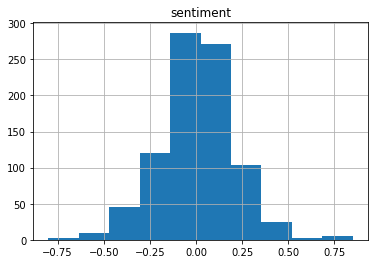

In [434]:
# depression sentiment histogram
df[df['target'] == 0].hist(column='sentiment');

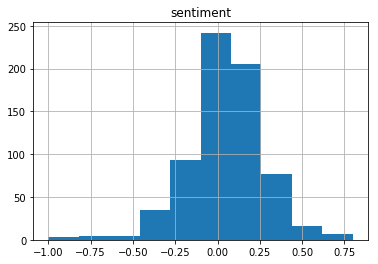

In [435]:
# Anxiety.sentiment histogram
df[df['target'] == 1].hist(column='sentiment');

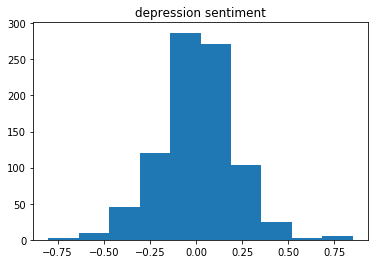

In [438]:
# depression sentiment histogram
depression = df[df['target'] == 0]
plt.hist(depression['sentiment'])
plt.title('depression sentiment');



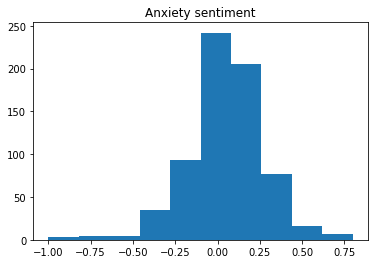

In [439]:
# depression sentiment histogram
Anxiety = df[df['target'] == 1]
plt.hist(Anxiety['sentiment'])
plt.title('Anxiety sentiment');


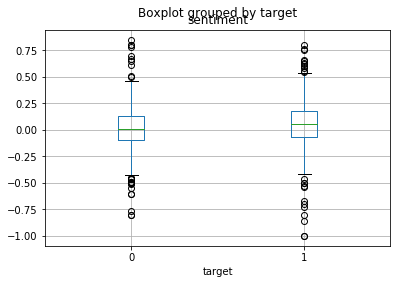

In [440]:
df.boxplot(column='sentiment', by='target');


In [441]:
print('Depression mean sentiment:', df[df['target'] == 0].sentiment.mean())
print('Depression mean sentiment:', df[df['target'] == 1].sentiment.mean())
print('')
print('Anxiety median sentiment:', df[df['target'] == 0].sentiment.median())
print('Anxiety median sentiment:', df[df['target'] == 1].sentiment.median())

Depression mean sentiment: 0.011232267418305722
Depression mean sentiment: 0.04876352608924696

Anxiety median sentiment: 0.010937500000000003
Anxiety median sentiment: 0.05722222222222222
